# ÂæÆË∞É‰∏éÂºïÂØº

Âú®Êú¨Á¨îËÆ∞Êú¨‰∏≠ÔºåÊàë‰ª¨Â∞Ü‰ªãÁªç‰∏§ÁßçÁî®‰∫éË∞ÉÊï¥Â∑≤ÊúâÊâ©Êï£Ê®°ÂûãÔºàdiffusion modelsÔºâÁöÑÊñπÊ≥ïÔºö

* **ÂæÆË∞ÉÔºàfine-tuningÔºâ**ÔºöÂú®Êñ∞Êï∞ÊçÆ‰∏äÈáçÊñ∞ËÆ≠ÁªÉÁé∞ÊúâÊ®°ÂûãÔºå‰ª•ÊîπÂèòÂÖ∂ËæìÂá∫Á±ªÂûã  
* **ÂºïÂØºÔºàguidanceÔºâ**ÔºöÂú®Êé®Êñ≠Èò∂ÊÆµÂØπÁé∞ÊúâÊ®°ÂûãÁöÑÁîüÊàêËøáÁ®ãËøõË°åÂºïÂØºÔºå‰ª•Ëé∑ÂæóÈ¢ùÂ§ñÁöÑÊéßÂà∂  

## ‰Ω†Â∞ÜÂ≠¶Âà∞‰ªÄ‰πà

ÂÆåÊàêÊú¨Á¨îËÆ∞Êú¨ÂêéÔºå‰Ω†Â∞ÜÊéåÊè°‰ª•‰∏ãÊäÄËÉΩÔºö

- ÁºñÂÜôÈááÊ†∑Âæ™ÁéØÔºåÂπ∂‰ΩøÁî®Êñ∞ÁöÑË∞ÉÂ∫¶Âô®Êõ¥Âø´Âú∞ÁîüÊàêÊ†∑Êú¨  
- Âú®Êñ∞Êï∞ÊçÆ‰∏äÂæÆË∞ÉÁé∞ÊúâÊâ©Êï£Ê®°ÂûãÔºåÂåÖÊã¨Ôºö  
  - ‰ΩøÁî®Ê¢ØÂ∫¶Á¥ØÁßØÔºàgradient accumulationÔºâËß£ÂÜ≥Â∞èÊâπÈáèËÆ≠ÁªÉÂ∏¶Êù•ÁöÑÈóÆÈ¢ò  
  - Âú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠Âà©Áî® [Weights and Biases](https://wandb.ai/site) ËÆ∞ÂΩïÊ†∑Êú¨Ôºå‰ª•‰æøÁõëÊéßËøõÂ∫¶ÔºàÁ§∫‰æãËÑöÊú¨Êèê‰æõÔºâ  
  - ‰øùÂ≠òËÆ≠ÁªÉÂæóÂà∞ÁöÑ pipeline Âπ∂‰∏ä‰º†Ëá≥ Hugging Face Hub  
- ÈÄöËøáÈôÑÂä†ÊçüÂ§±ÂáΩÊï∞Êù•ÂºïÂØºÈááÊ†∑ËøáÁ®ãÔºå‰∏∫Áé∞ÊúâÊ®°ÂûãÂ¢ûÂä†ÊéßÂà∂ËÉΩÂäõÔºåÂåÖÊã¨Ôºö  
  - ‰ΩøÁî®ÁÆÄÂçïÁöÑÂü∫‰∫éÈ¢úËâ≤ÁöÑÊçüÂ§±Êé¢Á¥¢‰∏çÂêåÁöÑÂºïÂØºÊñπÊ≥ï  
  - Âà©Áî® CLIP ÁªìÂêàÊñáÊú¨ÊèêÁ§∫ËØçÔºàtext promptÔºâÊù•ÂºïÂØºÁîüÊàê  
  - ‰ΩøÁî® Gradio Âíå ü§ó Spaces ÂÖ±‰∫´Ëá™ÂÆö‰πâÈááÊ†∑Âæ™ÁéØ 


In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from datasets import load_dataset
from diffusers import DDIMScheduler, DDPMPipeline
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm

d:\Users\yin-pu\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

## Âä†ËΩΩÈ¢ÑËÆ≠ÁªÉ Pipeline

È¶ñÂÖàÔºåËÆ©Êàë‰ª¨Âä†ËΩΩ‰∏Ä‰∏™Áé∞ÊúâÁöÑ pipelineÔºåÁúãÁúãÂèØ‰ª•ÂØπÂÆÉÂÅö‰∫õ‰ªÄ‰πàÔºö

In [3]:
# ÂØπ‰∫é Windows Áî®Êà∑Ôºö
# ËÆæÁΩÆ HF_ENDPOINT ÁéØÂ¢ÉÂèòÈáè‰∏∫ Hugging Face ÈïúÂÉèÊ∫êÔºàÁî®‰∫éÂõΩÂÜÖÂä†ÈÄüÔºâÔºå
# ÁÑ∂Âêé‰ΩøÁî® huggingface-cli ‰∏ãËΩΩÊ®°ÂûãÂà∞Êú¨Âú∞ÊåáÂÆöÁõÆÂΩï„ÄÇ
!set HF_ENDPOINT=https://hf-mirror.com&&huggingface-cli download google/ddpm-celebahq-256 --local-dir ./google/ddpm-celebahq-256 --repo-type model

# ÂØπ‰∫é Linux/macOS Áî®Êà∑ÔºåËØ∑‰ΩøÁî®‰ª•‰∏ãÂëΩ‰ª§ÔºàÊ≥®ÊÑè‰ΩøÁî® export ËÄå‰∏çÊòØ setÔºâÔºö
# !export HF_ENDPOINT=https://hf-mirror.com&&huggingface-cli download google/ddpm-celebahq-256 --local-dir ./google/ddpm-celebahq-256 --repo-type model

D:\projects\diffusion-models-class-zh\unit2\google\ddpm-celebahq-256



Fetching 10 files: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:00<00:00, 631.81it/s]


In [3]:
image_pipe = DDPMPipeline.from_pretrained("./google/ddpm-celebahq-256")
image_pipe.to(device)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch ./google/ddpm-celebahq-256: Error no file named diffusion_pytorch_model.safetensors found in directory ./google/ddpm-celebahq-256.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 14.76it/s]


DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "./google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

ÁîüÊàêÂõæÂÉèÂ∞±ÂÉèÂ∞ÜÁÆ°ÈÅìÁöÑ [`__call__`](https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/ddpm/pipeline_ddpm.py#L42) ÊñπÊ≥ïÂΩì‰ΩúÂáΩÊï∞Ë∞ÉÁî®‰∏ÄÊ†∑ÁÆÄÂçïÔºö


  0%|          | 0/1000 [00:00<?, ?it/s]d:\Users\yin-pu\miniconda3\Lib\site-packages\diffusers\models\attention_processor.py:3317: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:30<00:00, 32.37it/s]


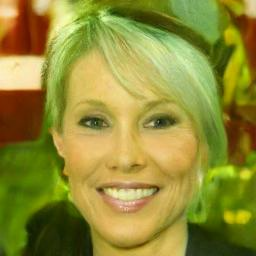

In [4]:
images = image_pipe().images
images[0]

ÂæàÂ∑ßÂ¶ôÔºå‰ΩÜÂ§™ÊÖ¢‰∫ÜÔºÅÊâÄ‰ª•ÔºåÂú®ËøõÂÖ•‰ªäÂ§©ÁöÑ‰∏ªË¶ÅÂÜÖÂÆπ‰πãÂâçÔºåËÆ©Êàë‰ª¨ÂÖàÊù•ÁúãÁúãÂÆûÈôÖÁöÑÈááÊ†∑Âæ™ÁéØÔºåÂπ∂Êé¢ËÆ®Â¶Ç‰Ωï‰ΩøÁî®Êõ¥ÂÖàËøõÁöÑÈááÊ†∑Âô®Êù•Âä†ÈÄüÂÆÉÔºö


## ‰ΩøÁî® DDIM ÁöÑÊõ¥Âø´ÈááÊ†∑

Âú®ÊØè‰∏ÄÊ≠•‰∏≠ÔºåÊ®°ÂûãÈÉΩ‰ºöÊé•Êî∂‰∏Ä‰∏™Â∏¶Âô™Â£∞ÁöÑËæìÂÖ•ÔºåÂπ∂Ë¢´Ë¶ÅÊ±ÇÈ¢ÑÊµãÂô™Â£∞Ôºà‰ªéËÄå‰º∞ËÆ°ÂÆåÂÖ®ÂéªÂô™ÂêéÂõæÂÉèÁöÑÊ†∑Ë≤åÔºâ„ÄÇËµ∑ÂàùÔºåËøô‰∫õÈ¢ÑÊµãÂπ∂‰∏çÂçÅÂàÜÂáÜÁ°ÆÔºåÂõ†Ê≠§Êàë‰ª¨Â∞ÜËØ•ËøáÁ®ãÂàÜËß£‰∏∫Â§ö‰∏™Ê≠•È™§„ÄÇÁÑ∂ËÄåÔºåÂÆûË∑µËØÅÊòéÔºå‰ΩøÁî®Ë∂ÖËøá 1000 Ê≠•ÊòØÊ≤°ÊúâÂøÖË¶ÅÁöÑÔºåËøëÊúüÂ§ßÈáèÁ†îÁ©∂Ëá¥Âäõ‰∫éÊé¢Á¥¢Â¶Ç‰ΩïÂú®Â∞ΩÂèØËÉΩÂ∞ëÁöÑÊ≠•È™§‰∏≠Ëé∑ÂæóÈ´òË¥®ÈáèÁöÑÊ†∑Êú¨„ÄÇ  


Âú® ü§ó Diffusers Â∫ì‰∏≠ÔºåËøô‰∫õ **ÈááÊ†∑ÊñπÊ≥ïÁî±Ë∞ÉÂ∫¶Âô®schedulerË¥üË¥£**ÔºåÂÆÉÂøÖÈ°ªÈÄöËøá `step()` ÂáΩÊï∞ÊâßË°åÊØè‰∏ÄÊ¨°Êõ¥Êñ∞„ÄÇ  

Ë¶ÅÁîüÊàêÂõæÂÉèÔºåÊàë‰ª¨‰ªéÈöèÊú∫Âô™Â£∞ $x$ ÂºÄÂßã„ÄÇÁÑ∂ÂêéÔºåÂØπ‰∫éË∞ÉÂ∫¶Âô®Âô™Â£∞Êó∂Èó¥Ë°®‰∏≠ÁöÑÊØè‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÔºåÊàë‰ª¨Â∞ÜÂ∏¶Âô™ËæìÂÖ• $x$ Êèê‰æõÁªôÊ®°ÂûãÔºåÂπ∂Â∞ÜÊ®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú‰º†ÈÄíÁªô `step()` ÂáΩÊï∞„ÄÇËØ•ÂáΩÊï∞ËøîÂõû‰∏Ä‰∏™Â∏¶Êúâ `prev_sample` Â±ûÊÄßÁöÑËæìÂá∫‚Äî‚Äî‰πãÊâÄ‰ª•Áß∞‰∏∫ ‚Äúprev‚Äù ÊòØÂõ†‰∏∫Êàë‰ª¨Âú®Êó∂Èó¥‰∏ä‰ªéÈ´òÂô™Â£∞Âêë‰ΩéÂô™Â£∞‚ÄúÂÄíÈÄÄ‚ÄùÔºà‰∏éÊ≠£ÂêëÊâ©Êï£ËøáÁ®ãÁõ∏ÂèçÔºâ„ÄÇ  

ËÆ©Êàë‰ª¨Êù•ÁúãÁúãÂÆûÈôÖÊìç‰ΩúÔºÅÈ¶ñÂÖàÔºåÊàë‰ª¨Âä†ËΩΩ‰∏Ä‰∏™Ë∞ÉÂ∫¶Âô®schedulerÔºåËøôÈáå‰ΩøÁî®Âü∫‰∫é [Denoising Diffusion Implicit Models](https://arxiv.org/abs/2010.02502) ËÆ∫ÊñáÁöÑ DDIMSchedulerÔºåÂÆÉËÉΩÂú®ËøúÂ∞ë‰∫éÂéüÂßã DDPM ÂÆûÁé∞ÁöÑÊ≠•È™§‰∏ãÁîüÊàê‰∏çÈîôÁöÑÊ†∑Êú¨Ôºö  


In [5]:
# Êñ∞Âª∫Ë∞ÉÂ∫¶Âô®Âπ∂ËÆæÁΩÆÊé®ÁêÜÊ≠•Êï∞
scheduler = DDIMScheduler.from_pretrained("./google/ddpm-celebahq-256")
scheduler.set_timesteps(num_inference_steps=40)

‰Ω†ÂèØ‰ª•ÁúãÂà∞ËØ•Ê®°ÂûãÊÄªÂÖ±ÊâßË°å‰∫Ü 40 ‰∏™Ê≠•È™§ÔºåÊØè‰∏ÄÊ≠•Áõ∏ÂΩì‰∫éÂéüÂßã 1000 Ê≠•Êó∂Èó¥Ë°®‰∏≠ÁöÑ 25 Ê≠•Ôºö

In [7]:
scheduler.timesteps

tensor([975, 950, 925, 900, 875, 850, 825, 800, 775, 750, 725, 700, 675, 650,
        625, 600, 575, 550, 525, 500, 475, 450, 425, 400, 375, 350, 325, 300,
        275, 250, 225, 200, 175, 150, 125, 100,  75,  50,  25,   0])

ËÆ©Êàë‰ª¨ÂàõÂª∫ 4 ‰∏™ÈöèÊú∫ÂõæÂÉèÂπ∂ËøêË°åÈááÊ†∑Âæ™ÁéØÔºåÂú®ËøáÁ®ã‰∏≠Êü•ÁúãÂΩìÂâçÁöÑ $x$ ‰ª•ÂèäÈ¢ÑÊµãÁöÑÈ¢ÑÊµãÂéªÂô™ÁªìÊûúÔºö


0it [00:00, ?it/s]

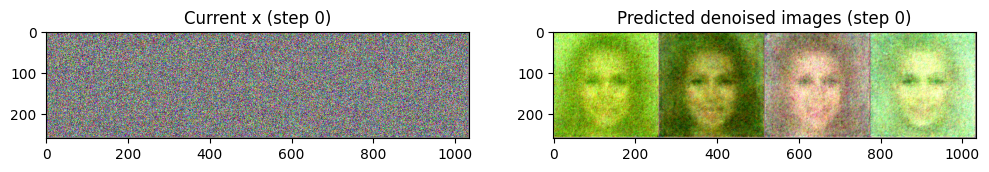

10it [00:01,  8.40it/s]

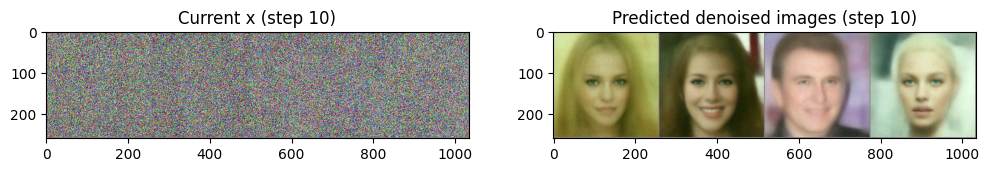

20it [00:02,  8.55it/s]

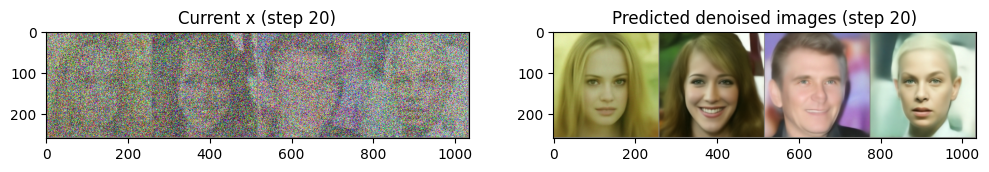

30it [00:03,  8.67it/s]

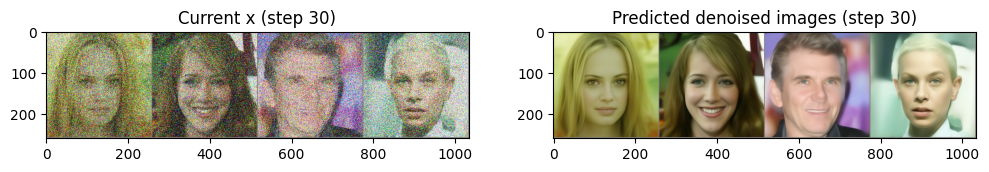

39it [00:05,  8.60it/s]

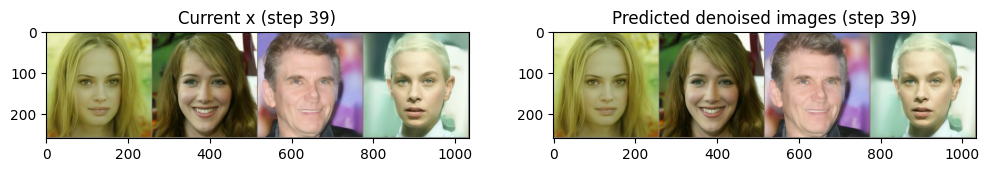

40it [00:05,  7.37it/s]


In [8]:
# ÈöèÊú∫Ëµ∑ÂßãÁÇπ
x = torch.randn(4, 3, 256, 256).to(device)  # ÊâπÈáè‰∏∫ 4ÔºåÊØèÂº†Âõæ 3 ÈÄöÈÅìÔºåÂ∞∫ÂØ∏ 256√ó256 ÂÉèÁ¥†

# ÈÄêÊ≠•ËøõË°åÈááÊ†∑
for i, t in tqdm(enumerate(scheduler.timesteps)):

    # ÂáÜÂ§áÊ®°ÂûãËæìÂÖ•
    model_input = scheduler.scale_model_input(x, t)

    # È¢ÑÊµãÂô™Â£∞
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]

    # ‰ΩøÁî®Ë∞ÉÂ∫¶Âô®ËÆ°ÁÆóÊõ¥Êñ∞ÂêéÁöÑÊ†∑Êú¨
    scheduler_output = scheduler.step(noise_pred, t, x)

    # Êõ¥Êñ∞ x
    x = scheduler_output.prev_sample

    # ÊØèÈöî 10 Ê≠•ÊàñÊúÄÂêé‰∏ÄÊ≠•ÂèØËßÜÂåñÂΩìÂâçÊ†∑Êú¨‰∏éÈ¢ÑÊµãÂéªÂô™ÁªìÊûú
    if i % 10 == 0 or i == len(scheduler.timesteps) - 1:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        grid = torchvision.utils.make_grid(x, nrow=4).permute(1, 2, 0)
        axs[0].imshow(grid.cpu().clip(-1, 1) * 0.5 + 0.5)
        axs[0].set_title(f"Current x (step {i})")

        pred_x0 = scheduler_output.pred_original_sample  # Âπ∂ÈùûÊâÄÊúâË∞ÉÂ∫¶Âô®ÈÉΩÊèê‰æõËØ•Â±ûÊÄß
        grid = torchvision.utils.make_grid(pred_x0, nrow=4).permute(1, 2, 0)
        axs[1].imshow(grid.cpu().clip(-1, 1) * 0.5 + 0.5)
        axs[1].set_title(f"Predicted denoised images (step {i})")
        plt.show()


Â¶Ç‰Ω†ÊâÄËßÅÔºåÂàùÂßãÈ¢ÑÊµãÊïàÊûúÂπ∂‰∏çÁêÜÊÉ≥Ôºå‰ΩÜÈöèÁùÄÊµÅÁ®ãÁöÑËøõË°åÔºåÈ¢ÑÊµãËæìÂá∫‰ºöÂèòÂæóË∂äÊù•Ë∂äÁ≤æÁªÜ„ÄÇ

ÊÇ®ËøòÂèØ‰ª•Â∞ÜÊ≠§Êñ∞Ë∞ÉÂ∫¶Âô®ÊõøÊç¢ÂéüÂßãpipeline‰∏≠ÈôÑÂ∏¶ÁöÑË∞ÉÂ∫¶Âô®ÔºåÂπ∂ÊåâÂ¶Ç‰∏ãÊñπÂºèËøõË°åÈááÊ†∑Ôºö  


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 27.73it/s]


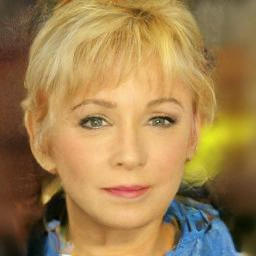

In [8]:
image_pipe.scheduler = scheduler
images = image_pipe(num_inference_steps=40).images
images[0]

Â•Ω‰∫Ü‚Äî‚ÄîÊàë‰ª¨Áé∞Âú®ÂèØ‰ª•Âú®ÂêàÁêÜÁöÑÊó∂Èó¥ÂÜÖËé∑ÂèñÊ†∑Êú¨‰∫ÜÔºÅËøôÊ†∑Âú®ÁªßÁª≠Êú¨Á¨îËÆ∞Êú¨Ââ©‰ΩôÂÜÖÂÆπÊó∂ÔºåÊïàÁéá‰ºöÊõ¥È´ò :)  

## ÂæÆË∞ÉÔºàFine-TuningÔºâ

Áé∞Âú®ËΩÆÂà∞Â•ΩÁé©ÁöÑÈÉ®ÂàÜ‰∫ÜÔºÅÂú®Â∑≤ÊúâÁöÑÈ¢ÑËÆ≠ÁªÉÁÆ°Á∫øÂü∫Á°Ä‰∏äÔºåÊàë‰ª¨Â¶Ç‰ΩïÂà©Áî®Êñ∞ÁöÑËÆ≠ÁªÉÊï∞ÊçÆÈáçÊñ∞ËÆ≠ÁªÉÊ®°ÂûãÔºå‰ªéËÄåÁîüÊàêÂØπÂ∫îÁöÑÂõæÂÉèÔºü

ÂÖ∂ÂÆûÔºåËøô‰∏ÄÊµÅÁ®ã‰∏é‰ªéÈõ∂ÂºÄÂßãËÆ≠ÁªÉÊ®°ÂûãÔºàÂèÇËßÅ [Unit 1](../unit1)ÔºâÂá†‰πéÂÆåÂÖ®Áõ∏ÂêåÔºåÂè™‰∏çËøáÊàë‰ª¨‰ªéÁé∞ÊúâÊ®°ÂûãÂá∫Âèë„ÄÇÊé•‰∏ãÊù•ÔºåËÆ©Êàë‰ª¨ÂÆûË∑µ‰∏ÄÈÅçÔºåÂπ∂Âú®ËøáÁ®ã‰∏≠ËÆ®ËÆ∫Âá†È°πÈ¢ùÂ§ñÁöÑÊ≥®ÊÑè‰∫ãÈ°π„ÄÇ


È¶ñÂÖàÔºåÊï∞ÊçÆÈõÜÔºö‰Ω†ÂèØ‰ª•Â∞ùËØï‰ΩøÁî® [Ëøô‰∏™Â§çÂè§‰∫∫ËÑ∏Êï∞ÊçÆÈõÜ](https://huggingface.co/datasets/Norod78/Vintage-Faces-FFHQAligned) ÊàñËÄÖ [Ëøô‰∫õÂä®Êº´‰∫∫ËÑ∏Êï∞ÊçÆÈõÜ](https://huggingface.co/datasets/huggan/anime-faces)ÔºåÂÆÉ‰ª¨Êõ¥Êé•ËøëÊúüÂàùËÑ∏ÈÉ®Ê®°ÂûãÁöÑÂéüÂßãËÆ≠ÁªÉÊï∞ÊçÆ„ÄÇ‰ΩÜ‰∏∫‰∫ÜÂ•ΩÁé©ÔºåÊàë‰ª¨ËøòÊòØÊ≤øÁî® Unit 1 ‰∏≠‰ªéÈõ∂ÂºÄÂßãËÆ≠ÁªÉÊó∂‰ΩøÁî®ÁöÑÈÇ£‰∏™Â∞èÂûãËù¥Ëù∂Êï∞ÊçÆÈõÜ„ÄÇËøêË°å‰∏ãÈù¢ÁöÑ‰ª£Á†ÅÂç≥ÂèØ‰∏ãËΩΩËù¥Ëù∂Êï∞ÊçÆÈõÜÔºåÂπ∂ÂàõÂª∫‰∏Ä‰∏™ËÉΩÂ§ü‰∏∫Êàë‰ª¨ÈöèÊú∫ÈááÊ†∑ÂõæÂÉèbatchÁöÑ DataLoaderÔºö



Fetching 4 files: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<00:00, 520.66it/s]
Repo card metadata block was not found. Setting CardData to empty.


D:\projects\diffusion-models-class-zh\unit2\huggan\smithsonian_butterflies_subset
Previewing batch:


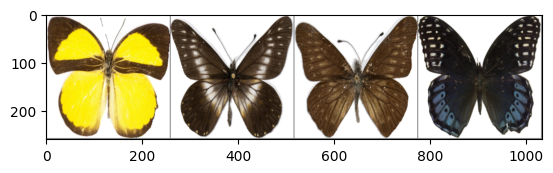

In [10]:
# ÂØπ‰∫é Windows Áî®Êà∑Ôºö
# ËÆæÁΩÆ HF_ENDPOINT ÁéØÂ¢ÉÂèòÈáè‰∏∫ Hugging Face ÈïúÂÉèÊ∫êÔºàÁî®‰∫éÂõΩÂÜÖÂä†ÈÄüÔºâÔºå
# ÁÑ∂Âêé‰ΩøÁî® huggingface-cli ‰∏ãËΩΩÊï∞ÊçÆÈõÜÂà∞Êú¨Âú∞ÊåáÂÆöÁõÆÂΩï„ÄÇ
!set HF_ENDPOINT=https://hf-mirror.com&&huggingface-cli download huggan/smithsonian_butterflies_subset --local-dir ./huggan/smithsonian_butterflies_subset --repo-type dataset

# ÂØπ‰∫é Linux/macOS Áî®Êà∑ÔºåËØ∑‰ΩøÁî®‰ª•‰∏ãÂëΩ‰ª§ÔºàÊ≥®ÊÑè‰ΩøÁî® export ËÄå‰∏çÊòØ setÔºâÔºö
# !export HF_ENDPOINT=https://hf-mirror.com&&huggingface-cli download huggan/smithsonian_butterflies_subset --local-dir ./huggan/smithsonian_butterflies_subset --repo-type dataset

dataset_name = "./huggan/smithsonian_butterflies_subset"  # @param
dataset = load_dataset(dataset_name, split="train")
image_size = 256  # @param
batch_size = 4  # @param
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)


def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}


dataset.set_transform(transform)

train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

print("Previewing batch:")
batch = next(iter(train_dataloader))
grid = torchvision.utils.make_grid(batch["images"], nrow=4)
plt.imshow(grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5)

**Ê≥®ÊÑè‰∫ãÈ°π 1Ôºö** Ê≠§Â§ÑÁöÑÊâπÈáèÂ§ßÂ∞è‰ªÖ‰∏∫ 4ÔºåËøôÊòØÂõ†‰∏∫Êàë‰ª¨Âú® 256 px ÁöÑÂ§ßÂ∞∫ÂØ∏ÂõæÂÉè‰∏äËÆ≠ÁªÉ‰∏Ä‰∏™Áõ∏ÂΩìÂ∫ûÂ§ßÁöÑÊ®°Âûã‚Äî‚ÄîÂ¶ÇÊûúÊääÊâπÈáèÂ§ßÂ∞èË∞ÉÂæóÊõ¥Â§ßÔºåGPU ÊòæÂ≠òÂ∞±‰ºö‰∏çË∂≥„ÄÇ‰Ω†ÂèØ‰ª•ÈÄöËøáÂáèÂ∞èÂõæÂÉèÂ∞∫ÂØ∏Êù•ÊèêÂçáËÆ≠ÁªÉÈÄüÂ∫¶Âπ∂ÂÖÅËÆ∏‰ΩøÁî®Êõ¥Â§ßÁöÑÊâπÈáèÂ§ßÂ∞èÔºå‰ΩÜËØ∑ËÆ∞‰ΩèÔºåËøô‰∫õÊ®°ÂûãÊúÄÂàùÁöÑËÆæËÆ°‰∏éËÆ≠ÁªÉÁõÆÊ†áÂàÜËæ®ÁéáÂ∞±ÊòØ 256 px„ÄÇ


## ËÆ≠ÁªÉ

Êé•‰∏ãÊù•ÊòØËÆ≠ÁªÉ„ÄÇÊàë‰ª¨ÈÄöËøáÂ∞Ü‰ºòÂåñÁõÆÊ†áËÆæ‰∏∫ `image_pipe.unet.parameters()` Êù•Êõ¥Êñ∞È¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÊùÉÈáç„ÄÇÂÖ∂‰ªñÈÉ®ÂàÜÂá†‰πé‰∏éÂçïÂÖÉ 1 ‰∏≠ÁöÑÁ§∫‰æãËÆ≠ÁªÉÂæ™ÁéØÂÆåÂÖ®Áõ∏Âêå„ÄÇÂú® Colab ‰∏äËøêË°åÂ§ßÁ∫¶ÈúÄË¶Å 10 ÂàÜÈíüÔºåÊâÄ‰ª•Ê≠£Â•ΩÂèØ‰ª•ÂéªÊ≥°ÊùØÂíñÂï°ÊàñËå∂ÔºåÁ®ç‰Ωú‰ºëÊÅØ„ÄÇ


  0%|          | 0/250 [00:00<?, ?it/s]d:\Users\yin-pu\miniconda3\Lib\site-packages\diffusers\configuration_utils.py:141: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDIMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDIMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 250/250 [01:26<00:00,  2.88it/s]


Epoch 0 average loss: 0.013234982942114584


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 250/250 [01:26<00:00,  2.89it/s]

Epoch 1 average loss: 0.012340625108743552


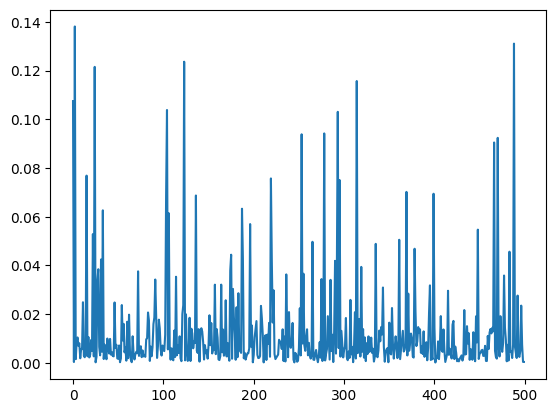

In [11]:
num_epochs = 2  # ËÆ≠ÁªÉËΩÆÊï∞
lr = 1e-5       # Â≠¶‰π†Áéá
grad_accumulation_steps = 2  # Ê¢ØÂ∫¶Á¥ØÁßØÊ≠•Êï∞

optimizer = torch.optim.AdamW(image_pipe.unet.parameters(), lr=lr)

losses = []

for epoch in range(num_epochs):
    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        clean_images = batch["images"].to(device)
        
        # ‰∏∫ÂõæÂÉèÁîüÊàêÈöèÊú∫Âô™Â£∞
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        bs = clean_images.shape[0]

        # ‰∏∫ÊØèÂº†ÂõæÂÉèÈöèÊú∫ÈááÊ†∑‰∏Ä‰∏™Êó∂Èó¥Ê≠•
        timesteps = torch.randint(
            0,
            image_pipe.scheduler.num_train_timesteps,
            (bs,),
            device=clean_images.device,
        ).long()

        # ÊåâÁÖßÊØè‰∏™Êó∂Èó¥Ê≠•ÁöÑÂô™Â£∞ÂπÖÂ∫¶ÂêëÂπ≤ÂáÄÂõæÂÉè‰∏≠Âä†ÂÖ•Âô™Â£∞
        # ÔºàÂç≥ÂâçÂêëÊâ©Êï£ËøáÁ®ãÔºâ
        noisy_images = image_pipe.scheduler.add_noise(clean_images, noise, timesteps)

        # ‰ΩøÁî®Ê®°ÂûãÈ¢ÑÊµãÂô™Â£∞
        noise_pred = image_pipe.unet(noisy_images, timesteps, return_dict=False)[0]

        # Â∞ÜÈ¢ÑÊµãÁöÑÂô™Â£∞‰∏éÁúüÂÆûÂô™Â£∞ËøõË°åÊØîËæÉ
        # Ê≥®ÊÑèÔºöÊàë‰ª¨Ë¶ÅÈ¢ÑÊµãÁöÑÊòØÂô™Â£∞ ŒµÔºåËÄå‰∏çÊòØ (noisy_images - clean_images) Êàñ clean_images Êú¨Ë∫´
        loss = F.mse_loss(noise_pred, noise)

        # ‰øùÂ≠òÊçüÂ§±Ôºå‰æø‰∫éÂêéÁª≠ÁªòÂõæ
        losses.append(loss.item())

        # Ê†πÊçÆÊçüÂ§±Êõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞
        loss.backward()

        # Ê¢ØÂ∫¶Á¥ØÁßØ
        if (step + 1) % grad_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

    print(
        f"Epoch {epoch} average loss: {sum(losses[-len(train_dataloader):]) / len(train_dataloader)}"
    )

# ÁªòÂà∂ÊçüÂ§±Êõ≤Á∫ø
plt.plot(losses)


**Ê≥®ÊÑè‰∫ãÈ°π 2Ôºö** Áî±‰∫éÊØè‰∏ÄÊ≠•Êàë‰ª¨Âè™Âú®batch_size=4‰∏ä„ÄÅ‰∏î‰ΩøÁî®ÈöèÊú∫Âô™Â£∞Âº∫Â∫¶ËøõË°åËÆ≠ÁªÉÔºåÊçüÂ§±‰ø°Âè∑ÈùûÂ∏∏ÂòàÊùÇÔºåËøôÂØπËÆ≠ÁªÉÂπ∂‰∏çÁêÜÊÉ≥„ÄÇ‰∏Ä‰∏™Ëß£ÂÜ≥ÂäûÊ≥ïÊòØ‰ΩøÁî®ÊûÅ‰ΩéÁöÑÂ≠¶‰π†ÁéáÔºå‰ª•ÈôêÂà∂ÊØè‰∏ÄÊ≠•ÂèÇÊï∞Êõ¥Êñ∞ÁöÑÂπÖÂ∫¶„ÄÇÂ¶ÇÊûúËÉΩÂú® **‰∏ç** ËÆ©ÊòæÂ≠òÈúÄÊ±ÇÈ£ôÂçáÁöÑÂâçÊèê‰∏ãÔºåËé∑Âæó‰∏é‰ΩøÁî®ËæÉÂ§ßÊâπÈáèÂ§ßÂ∞èÁõ∏ÂêåÁöÑÊïàÊûúÔºåÈÇ£Â∞±Êõ¥Â•Ω‰∫Ü‚Ä¶‚Ä¶

ËøôÊó∂Â∞±ËΩÆÂà∞ [Ê¢ØÂ∫¶Á¥ØÁßØ](https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/02/19/gradient-accumulation.html#:~:text=Simply%20speaking%2C%20gradient%20accumulation%20means,might%20find%20this%20tutorial%20useful.) ÁôªÂú∫‰∫Ü„ÄÇÂ¶ÇÊûúÊàë‰ª¨Âú®Ë∞ÉÁî® `optimizer.step()` Âíå `optimizer.zero_grad()` ‰πãÂâçÂ§öÊ¨°ÊâßË°å `loss.backward()`ÔºåPyTorch ‰ºöÂ∞ÜÊ¢ØÂ∫¶ **Á¥ØÂä†ÔºàÊ±ÇÂíåÔºâ**‚Äî‚ÄîÁõ∏ÂΩì‰∫éÊääÂ§ö‰∏™Â∞èÊâπÊ¨°ÁöÑ‰ø°Âè∑ÂêàÂπ∂Âú®‰∏ÄËµ∑ÔºåÂæóÂà∞‰∏ÄÊ¨°Êõ¥Â•ΩÁöÑÊ¢ØÂ∫¶‰º∞ËÆ°ÔºåÁÑ∂ÂêéÂÜçÁî®ÂÆÉÊù•Êõ¥Êñ∞ÂèÇÊï∞„ÄÇËøôÊ†∑ÔºåÊÄªÁöÑÂèÇÊï∞Êõ¥Êñ∞Ê¨°Êï∞Â∞±‰ºöÂáèÂ∞ëÔºåÂ∞±ÂÉè‰ΩøÁî®Êõ¥Â§ßÊâπÈáèÂ§ßÂ∞èÊó∂ÁöÑÊÉÖÂÜµ‰∏ÄÊ†∑„ÄÇËÆ∏Â§öÊ°ÜÊû∂ÈÉΩÂèØ‰ª•Ëá™Âä®Â∏Æ‰Ω†ÂÆåÊàêËøô‰ª∂‰∫ãÔºà‰æãÂ¶Ç [ü§ó Accelerate ËÆ©ËøôÂèòÂæóÂæàÁÆÄÂçï](https://huggingface.co/docs/accelerate/usage_guides/gradient_accumulation)ÔºâÔºå‰ΩÜËá™Â∑±‰ªéÈõ∂ÂÆûÁé∞‰∏ÄÈÅç‰πüÂæàÊúâ‰ª∑ÂÄºÔºåÂõ†‰∏∫ËøôÊòØÂú®ÂèóÈôê GPU ÂÜÖÂ≠òÊù°‰ª∂‰∏ãËÆ≠ÁªÉÊ®°ÂûãÁöÑÂÆûÁî®ÊäÄÂ∑ßÔºÅÊ≠£Â¶Ç‰∏äÈù¢‰ª£Á†Å‰∏≠Ôºà`# Ê¢ØÂ∫¶Á¥ØÁßØ` Ê≥®Èáä‰πãÂêéÁöÑÈÉ®ÂàÜÔºâÊâÄÁ§∫ÔºåÂÆûÁé∞ÂÆÉÊâÄÈúÄÁöÑ‰ª£Á†ÅÂÖ∂ÂÆûÈùûÂ∏∏Â∞ë„ÄÇ

ÁªÉ‰π†ÔºöÂ∞ùËØïÂú® Unit 1 ÁöÑËÆ≠ÁªÉÂæ™ÁéØ‰∏≠Âä†ÂÖ•Ê¢ØÂ∫¶Á¥ØÁßØ„ÄÇÊïàÊûúÂ¶Ç‰ΩïÔºüÊÄùËÄÉ‰∏Ä‰∏ãÊòØÂê¶ÈúÄË¶ÅÊ†πÊçÆÊ¢ØÂ∫¶Á¥ØÁßØÊ≠•Êï∞Ë∞ÉÊï¥Â≠¶‰π†Áéá‚Äî‚ÄîÂ≠¶‰π†ÁéáÂ∫îËØ•‰øùÊåÅÂíå‰πãÂâç‰∏ÄÊ†∑ÂêóÔºü


40it [00:09,  4.40it/s]


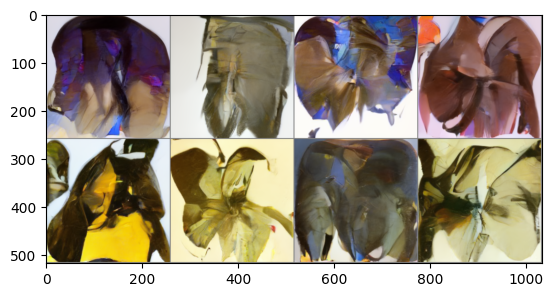

In [ ]:
x = torch.randn(8, 3, 256, 256).to(device) 
for i, t in tqdm(enumerate(scheduler.timesteps)):
    model_input = scheduler.scale_model_input(x, t)
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]
    x = scheduler.step(noise_pred, t, x).prev_sample
grid = torchvision.utils.make_grid(x, nrow=4)
plt.imshow(grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5);

**Ê≥®ÊÑè‰∫ãÈ°π 3Ôºö**  ÂæÆË∞ÉÂèØËÉΩÈùûÂ∏∏‰∏çÂèØÈ¢ÑÊµãÔºÅÂ¶ÇÊûúÊàë‰ª¨ËÆ≠ÁªÉÊõ¥ÈïøÊó∂Èó¥ÔºåÂèØËÉΩ‰ºöÁúãÂà∞‰∏Ä‰∫õÂÆåÁæéÁöÑËù¥Ëù∂„ÄÇ‰ΩÜ‰∏≠Èó¥Èò∂ÊÆµÊú¨Ë∫´Â∞±ÊûÅÂÖ∑Ë∂£Âë≥ÊÄßÔºåÁâπÂà´ÊòØÂ¶ÇÊûú‰Ω†ÂØπËâ∫ÊúØÊñπÈù¢Êõ¥ÊÑüÂÖ¥Ë∂£ÁöÑËØùÔºÅÂèØ‰ª•Â∞ùËØïÈùûÂ∏∏Áü≠ÊàñÈùûÂ∏∏ÈïøÁöÑËÆ≠ÁªÉÂë®ÊúüÔºåÂπ∂Ë∞ÉÊï¥Â≠¶‰π†ÁéáÔºåÁúãÁúãËøô‰∫õÂèòÂåñÂ¶Ç‰ΩïÂΩ±ÂìçÊúÄÁªàÊ®°ÂûãÁöÑËæìÂá∫Á±ªÂûã„ÄÇ

### ‰øùÂ≠òÂæÆË∞ÉÂêéÁöÑpipeline

Áé∞Âú®Êàë‰ª¨Â∑≤Âú®Êâ©Êï£Ê®°Âûã‰∏≠ÂæÆË∞É‰∫Ü U-NetÔºåËÆ©Êàë‰ª¨ÈÄöËøáËøêË°å‰ª•‰∏ãÂëΩ‰ª§Â∞ÜÂÖ∂‰øùÂ≠òÂà∞Êú¨Âú∞Êñá‰ª∂Â§πÔºö

In [18]:
image_pipe.save_pretrained("my-finetuned-model")

## ÂºïÂØºÔºàGuidanceÔºâ

Â¶ÇÊûúÊàë‰ª¨Â∏åÊúõÂØπÁîüÊàêÁöÑÊ†∑Êú¨ËøõË°å‰∏ÄÂÆöÁ®ãÂ∫¶ÁöÑÊéßÂà∂ÔºåËØ•ÊÄé‰πàÂäûÔºü‰æãÂ¶ÇÔºåÂÅáËÆæÊàë‰ª¨ÊÉ≥ËÆ©ÁîüÊàêÁöÑÂõæÂÉèÂÅèÂêëÊüêÁßçÁâπÂÆöÁöÑÈ¢úËâ≤ÔºåËØ•Â¶Ç‰ΩïÂÆûÁé∞Âë¢ÔºüËøôÊó∂Â∞±Ë¶ÅÁî®Âà∞ **Guidance** ‚Äî‚Äî ‰∏ÄÁßçÂú®ÈááÊ†∑ËøáÁ®ã‰∏≠Âä†ÂÖ•È¢ùÂ§ñÊéßÂà∂ÁöÑÊäÄÊúØ„ÄÇ


Á¨¨‰∏ÄÊ≠•ÊòØÂàõÂª∫Êàë‰ª¨ÁöÑ **Êù°‰ª∂ÂáΩÊï∞**Ôºö‰πüÂ∞±ÊòØÊàë‰ª¨Â∏åÊúõÊúÄÂ∞èÂåñÁöÑÊüêÁßçÂ∫¶ÈáèÔºàÊçüÂ§±Ôºâ„ÄÇ‰∏ãÈù¢ËøôÊÆµÁ§∫‰æã‰ª£Á†ÅÈÄÇÁî®‰∫éÈ¢úËâ≤‰ªªÂä°‚Äî‚ÄîÂÆÉÂ∞ÜÂõæÂÉèÂÉèÁ¥†‰∏éÁõÆÊ†áÈ¢úËâ≤ÔºàÈªòËÆ§ÊòØ‰∏ÄÁßçÊµÖÈùíËâ≤ÔºâÈÄêÂÉèÁ¥†ÊØîËæÉÔºåÂπ∂ËøîÂõûÂπ≥ÂùáËØØÂ∑Æ„ÄÇ

In [19]:
def color_loss(images, target_color=(0.1, 0.9, 0.5)):
    """
    ÁªôÂÆö‰∏Ä‰∏™ÁõÆÊ†áÈ¢úËâ≤ (R, G, B)ÔºåËøîÂõûÂõæÂÉè‰∏≠ÂÉèÁ¥†Âπ≥ÂùáÂÅèÁ¶ªËØ•È¢úËâ≤ÁöÑÊçüÂ§±„ÄÇ
    ÈªòËÆ§ÁõÆÊ†áÈ¢úËâ≤‰∏∫ÊµÖÈùíËâ≤: (0.1, 0.9, 0.5)
    """
    # Â∞ÜÁõÆÊ†áÈ¢úËâ≤Êò†Â∞ÑÂà∞ (-1, 1) Âå∫Èó¥
    target = torch.tensor(target_color).to(images.device) * 2 - 1
    # Ë∞ÉÊï¥ÂΩ¢Áä∂‰∏∫ (batch, channel, height, width) ‰ª•ÂåπÈÖç images
    target = target[None, :, None, None]
    # ËÆ°ÁÆóÂõæÂÉèÂÉèÁ¥†‰∏éÁõÆÊ†áÈ¢úËâ≤‰πãÈó¥ÁöÑÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ
    error = torch.abs(images - target).mean()
    return error

Êé•‰∏ãÊù•ÔºåÊàë‰ª¨Â∞ÜÂØπÈááÊ†∑Âæ™ÁéØËøõË°å‰øÆÊîπÔºå‰ΩøÂÖ∂Âú®ÊØè‰∏ÄÊ≠•ÊâßË°å‰ª•‰∏ãÊìç‰ΩúÔºö

- ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑ `x` Âπ∂Â∞Ü `requires_grad` ËÆæ‰∏∫ `True`  
- ËÆ°ÁÆóÂéªÂô™ÂêéÁöÑÁâàÊú¨Ôºà`x0`Ôºâ  
- Â∞ÜÈ¢ÑÊµãÂæóÂà∞ÁöÑ `x0` ‰º†ÂÖ•Êàë‰ª¨ÁöÑÊçüÂ§±ÂáΩÊï∞  
- ËÆ°ÁÆóËØ•ÊçüÂ§±ÂáΩÊï∞ÂØπ `x` ÁöÑ **Ê¢ØÂ∫¶**  
- Âú®Ë∞ÉÂ∫¶Âô®ÔºàschedulerÔºâstep‰πãÂâçÔºåÁî®Ëøô‰∏ÄÊù°‰ª∂Ê¢ØÂ∫¶‰øÆÊ≠£ `x`Ôºå‰ª•ÊúüÊåâÁÖßÊàë‰ª¨ÁöÑÂºïÂØºÂáΩÊï∞Ôºàguidance functionÔºâÂ∞Ü `x` Êé®ÂêëÊõ¥‰ΩéÊçüÂ§±ÁöÑÊñπÂêë  

ËøôÈáåÊúâ‰∏§ÁßçÂèØÊé¢Á¥¢ÁöÑÂèò‰ΩìÔºö  

1. **ÂÖà**ÈÄöËøá UNet Ëé∑ÂèñÂô™Â£∞È¢ÑÊµãÔºåÂÜçÂØπ `x` ËÆæÁΩÆ `requires_grad`„ÄÇËøôÁßçÊñπÂºèÊõ¥ËäÇÁúÅÊòæÂ≠òÔºàÊó†ÈúÄÂõûÊ∫ØÊ¢ØÂ∫¶Ëá≥Êâ©Êï£Ê®°ÂûãÔºâÔºå‰ΩÜÂæóÂà∞ÁöÑÊ¢ØÂ∫¶Á≤æÂ∫¶ËæÉ‰Ωé„ÄÇ  
2. **ÂÖà**ÂØπ `x` ËÆæÁΩÆ `requires_grad`ÔºåÂÜçÂ∞ÜÂÖ∂ËæìÂÖ• UNet Âπ∂ËÆ°ÁÆóÈ¢ÑÊµãÁöÑ `x0`Ôºå‰ª•Ëé∑ÂæóÊõ¥ÂáÜÁ°ÆÁöÑÊ¢ØÂ∫¶„ÄÇ  

1it [00:00,  3.09it/s]

0 loss: 32.21052169799805


11it [00:02,  4.24it/s]

10 loss: 15.44047737121582


21it [00:05,  4.24it/s]

20 loss: 15.485294342041016


31it [00:07,  4.25it/s]

30 loss: 15.711200714111328


40it [00:09,  4.24it/s]


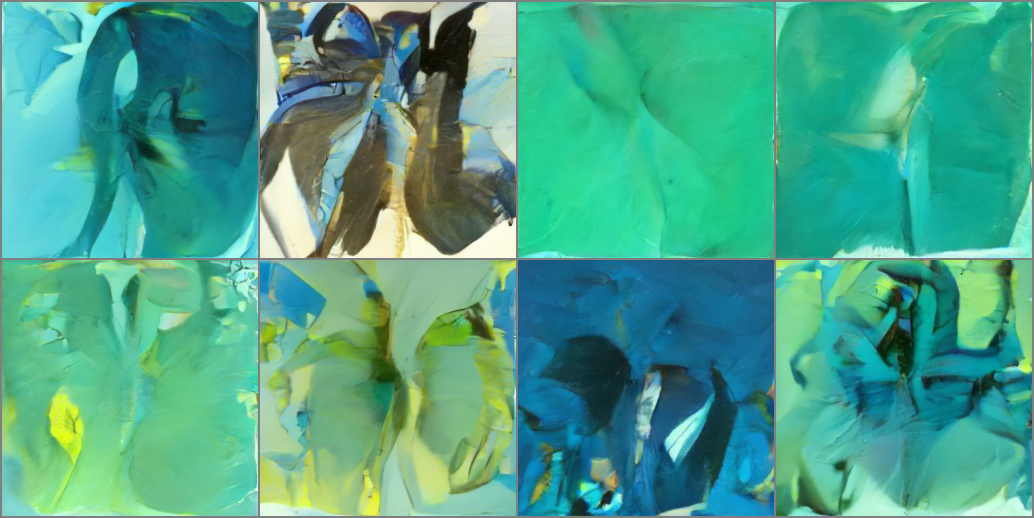

In [21]:
# Âèò‰Ωì 1

# guidance_loss_scale ÂÜ≥ÂÆöÂºïÂØºÊïàÊûúÁöÑÂº∫Â∫¶
guidance_loss_scale = 40  # ÂèØÂ∞ùËØï‰øÆÊîπ‰∏∫ 5 Êàñ 100

x = torch.randn(8, 3, 256, 256).to(device)

for i, t in tqdm(enumerate(scheduler.timesteps)):

    # ÂáÜÂ§áÁî®‰∫éÊ®°ÂûãÁöÑËæìÂÖ•
    model_input = scheduler.scale_model_input(x, t)

    # È¢ÑÊµãÂô™Â£∞ÊÆãÂ∑Æ
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]

    # Â∞Ü x.requires_grad ËÆæ‰∏∫ TrueÔºå‰ª•‰æøËÆ°ÁÆóÊ¢ØÂ∫¶
    x = x.detach().requires_grad_()

    # Ëé∑ÂèñÈ¢ÑÊµãÁöÑ x0
    x0 = scheduler.step(noise_pred, t, x).pred_original_sample

    # ËÆ°ÁÆóÊçüÂ§±
    loss = color_loss(x0) * guidance_loss_scale
    if i % 10 == 0:
        print(i, "loss:", loss.item())

    # ËÆ°ÁÆóÊ¢ØÂ∫¶ÔºàÂèñË¥üÂè∑‰ª•ËøõË°åÊ¢ØÂ∫¶‰∏äÂçáÔºâ
    cond_grad = -torch.autograd.grad(loss, x)[0]

    # Ê†πÊçÆÊ¢ØÂ∫¶Êõ¥Êñ∞ x
    x = x.detach() + cond_grad

    # ‰ΩøÁî®Ë∞ÉÂ∫¶Âô®ÂâçËøõ‰∏ÄÊ≠•
    x = scheduler.step(noise_pred, t, x).prev_sample

# Êü•ÁúãËæìÂá∫
grid = torchvision.utils.make_grid(x, nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))


Â∞ΩÁÆ°Êàë‰ª¨Âè™ÁîüÊàêÂõõÂº†ÂõæÂÉèËÄå‰∏çÊòØÂÖ´Âº†Ôºå‰ΩÜÁ¨¨‰∫åÁßçÊñπÊ°àÂç¥ÈúÄË¶ÅÂá†‰πé‰∏§ÂÄçÁöÑ GPU ÊòæÂ≠ò„ÄÇËØïÁùÄÊâæÂá∫ÂÖ∂‰∏≠ÁöÑÂ∑ÆÂà´ÔºåÂπ∂ÊÄùËÄÉ‰∏∫‰ªÄ‰πàËøôÁßçÊñπÊ≥ï‰ºöÊõ¥‚ÄúÂáÜÁ°Æ‚ÄùÔºö


1it [00:00,  1.73it/s]

0 loss: 30.875242233276367


11it [00:02,  4.19it/s]

10 loss: 11.698451042175293


21it [00:05,  4.23it/s]

20 loss: 11.344587326049805


31it [00:07,  4.21it/s]

30 loss: 11.523704528808594


40it [00:09,  4.12it/s]


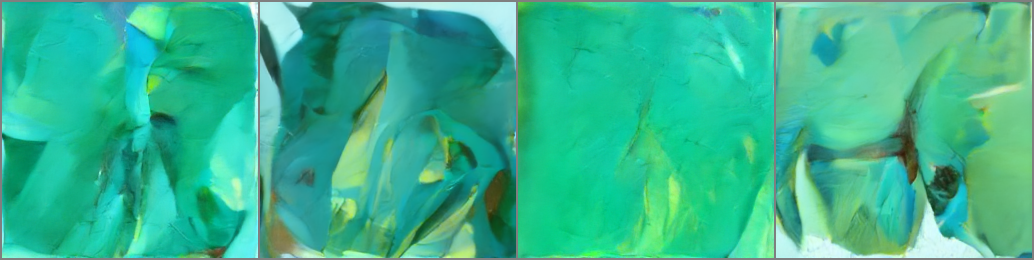

In [22]:
# ÊñπÊ°à 2ÔºöÂú®Ê®°ÂûãÂâçÂêë‰º†Êí≠‰πãÂâçÂ∞±ËÆæÁΩÆ x.requires_grad

guidance_loss_scale = 40  # ÂºïÂØºÊçüÂ§±Áº©ÊîæÁ≥ªÊï∞ÔºåÂèØÊ†πÊçÆÈúÄË¶ÅË∞ÉÊï¥
x = torch.randn(4, 3, 256, 256).to(device)  # ÈöèÊú∫ÂàùÂßãÂåñÂô™Â£∞ÂõæÂÉè

for i, t in tqdm(enumerate(scheduler.timesteps)):

    # Âú®Ê®°ÂûãÂâçÂêë‰º†Êí≠‰πãÂâçËÆæÁΩÆ requires_gradÔºå‰ª•‰æøÂêéÁª≠ËÆ°ÁÆóÊ¢ØÂ∫¶
    x = x.detach().requires_grad_()
    model_input = scheduler.scale_model_input(x, t)  # Ê†πÊçÆÊó∂Èó¥Ê≠•Áº©ÊîæËæìÂÖ•

    # È¢ÑÊµãÂô™Â£∞ÊÆãÂ∑ÆÔºàÊ≠§Êó∂ÈúÄË¶ÅÊ¢ØÂ∫¶Ôºâ
    noise_pred = image_pipe.unet(model_input, t)["sample"]

    # ÈÄöËøáË∞ÉÂ∫¶Âô®ÂæóÂà∞È¢ÑÊµãÁöÑ x0ÔºàÂéªÂô™ÂêéÁöÑÂõæÂÉèÔºâ
    x0 = scheduler.step(noise_pred, t, x).pred_original_sample

    # ËÆ°ÁÆóÊçüÂ§±ÔºöËøôÈáå‰ΩøÁî®È¢úËâ≤ÊçüÂ§±Âπ∂‰πò‰ª•ÂºïÂØºÁ≥ªÊï∞
    loss = color_loss(x0) * guidance_loss_scale
    if i % 10 == 0:
        print(i, "loss:", loss.item())  # ÊØè 10 Ê≠•ÊâìÂç∞‰∏ÄÊ¨°ÊçüÂ§±

    # ËÆ°ÁÆóÊ¢ØÂ∫¶ÔºàÂèñË¥üÂè∑ÔºåËøõË°åÊ¢ØÂ∫¶‰∏äÂçá‰ª•Âº∫ÂåñÁõÆÊ†áÁâπÊÄßÔºâ
    cond_grad = -torch.autograd.grad(loss, x)[0]

    # Ê†πÊçÆÊ¢ØÂ∫¶Êõ¥Êñ∞ x
    x = x.detach() + cond_grad

    # ‰ΩøÁî®Ë∞ÉÂ∫¶Âô®ÂâçËøõ‰∏ÄÊ≠•ÔºåÁîüÊàê‰∏ã‰∏Ä‰∏™Êó∂Èó¥Ê≠•ÁöÑÂõæÂÉè
    x = scheduler.step(noise_pred, t, x).prev_sample

# Â∞ÜÊúÄÁªàÁªìÊûúÊãºÊé•ÊàêÁΩëÊ†ºÂπ∂ÂèØËßÜÂåñ
grid = torchvision.utils.make_grid(x, nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))


## CLIP ÂºïÂØºÔºàCLIP GuidanceÔºâ

color guidance‰ªÖ‰ªÖÂ∞ÜÁîüÊàêÁªìÊûúÂÅèÂêëÊüêÁßçÈ¢úËâ≤ËÉΩÂ∏¶Êù•‰∏Ä‰∫õÊéßÂà∂ÂäõÔºå‰ΩÜÂ¶ÇÊûúÊàë‰ª¨Âè™ÊÉ≥ËæìÂÖ•ÊñáÂ≠óÊèèËø∞Âç≥ÂèØÁîüÊàêÊÉ≥Ë¶ÅÁöÑÂõæÂÉèÂë¢Ôºü

[CLIP](https://openai.com/blog/clip/) ÊòØ OpenAI ÊèêÂá∫ÁöÑ‰∏Ä‰∏™Ê®°ÂûãÔºåËÉΩÂ§üÊØîËæÉÂõæÂÉè‰∏éÊñáÊú¨ÊèèËø∞‰πãÈó¥ÁöÑÁõ∏‰ººÂ∫¶„ÄÇËøôÈùûÂ∏∏Âº∫Â§ßÔºåÂõ†‰∏∫ÂÆÉËÆ©Êàë‰ª¨ÂèØ‰ª•ÈáèÂåñ‰∏ÄÂπÖÂõæÂÉè‰∏éÊèêÁ§∫ÊñáÊú¨ÁöÑÂåπÈÖçÁ®ãÂ∫¶„ÄÇËÄå‰∏îÁî±‰∫éÊï¥‰∏™ËøáÁ®ãÊòØÂèØÂæÆÁöÑÔºåÊàë‰ª¨ÂèØ‰ª•ÊääËøôÁßçÂåπÈÖçÂ∫¶ÂΩì‰ΩúÊçüÂ§±ÂáΩÊï∞ÔºåÁî®Êù•ÂºïÂØºÊâ©Êï£Ê®°ÂûãÔºÅ

‰∏ãÈù¢ÁªôÂá∫ÁÆÄË¶ÅÊÄùË∑ØÔºà‰∏çÊ∑±ÂÖ•ÁªÜËäÇÔºâÔºö

- **Â∞ÜÊñáÊú¨ÊèêÁ§∫** ËΩ¨Êç¢‰∏∫‰∏Ä‰∏™ 512 Áª¥ÁöÑ CLIP ÊñáÊú¨ÂµåÂÖ•ÂêëÈáè  
- **Âú®Êâ©Êï£Ê®°ÂûãÁöÑÊØè‰∏ÄÊ≠•** ‰∏≠Ôºö  
  - ÁîüÊàêËã•Âπ≤‰∏™ÂΩìÂâçÂéªÂô™ÂõæÂÉèÁöÑÂèò‰ΩìÔºàÂ§öÁîüÊàêÂá†‰∏™ÁâàÊú¨ÂèØ‰ª•ÂæóÂà∞Êõ¥Âπ≤ÂáÄÁöÑÊçüÂ§±‰ø°Âè∑Ôºâ  
  - ÂØπÊØè‰∏™Âèò‰ΩìÔºå‰ΩøÁî® CLIP Ëé∑ÂèñÂõæÂÉèÂµåÂÖ•ÔºåÂπ∂‰∏éÊñáÊú¨ÂµåÂÖ•ËÆ°ÁÆóÁõ∏‰ººÂ∫¶ÔºàËøôÈáå‰ΩøÁî®ÁöÑÊòØ„ÄåÂ§ßÂúÜË∑ùÁ¶ªÂπ≥Êñπ„Äç *Great Circle Distance Squared*Ôºâ  
- **ËÆ°ÁÆóËØ•ÊçüÂ§±** ÂØπÂΩìÂâçÂô™Â£∞ÂõæÂÉè `x` ÁöÑÊ¢ØÂ∫¶ÔºåÂπ∂Âú®Ë∞ÉÂ∫¶Âô®Êõ¥Êñ∞ `x` ‰πãÂâçÂà©Áî®ËØ•Ê¢ØÂ∫¶ÂØπ `x` ËøõË°åË∞ÉÊï¥  

Ëã•ÊÉ≥Ê∑±ÂÖ•‰∫ÜËß£ CLIPÔºåÂèØÂèÇËÄÉ [ËøôÁØáËØæÁ®ãÁ¨îËÆ∞](https://johnowhitaker.github.io/tglcourse/clip.html) Êàñ [OpenCLIP È°πÁõÆÊä•Âëä](https://wandb.ai/johnowhitaker/openclip-benchmarking/reports/Exploring-OpenCLIP--VmlldzoyOTIzNzIz)ÔºåÊàë‰ª¨Âú®ÂÖ∂‰∏≠Âä†ËΩΩ‰∫Ü CLIP Ê®°Âûã„ÄÇËøêË°å‰∏ã‰∏ÄÂçïÂÖÉÂç≥ÂèØÂä†ËΩΩ CLIP Ê®°Âûã„ÄÇ


Ê≥®ÊÑèÔºöËøôÈáå‰ΩøÁî®‰∏≠ÊñáclipÊù•ÂÆûÁé∞ÔºåÂõ†Ê≠§ÂíåÂéüËØæÁ®ãÁöÑËØæÁ®ãÂÆûÁé∞Â≠òÂú®Áï•Êúâ‰∏çÂêå

In [1]:
# ÂÖà‰∏ãËΩΩ"OFA-Sys/chinese-clip-vit-base-patch16"

# ÂØπ‰∫é Windows Áî®Êà∑Ôºö
# ËÆæÁΩÆ HF_ENDPOINT ÁéØÂ¢ÉÂèòÈáè‰∏∫ Hugging Face ÈïúÂÉèÊ∫êÔºàÁî®‰∫éÂõΩÂÜÖÂä†ÈÄüÔºâÔºå
# ÁÑ∂Âêé‰ΩøÁî® huggingface-cli ‰∏ãËΩΩÊ®°ÂûãÂà∞Êú¨Âú∞ÊåáÂÆöÁõÆÂΩï„ÄÇ
!set HF_ENDPOINT=https://hf-mirror.com&&huggingface-cli download OFA-Sys/chinese-clip-vit-base-patch16 --local-dir ./OFA-Sys/chinese-clip-vit-base-patch16 --repo-type model

# ÂØπ‰∫é Linux/macOS Áî®Êà∑ÔºåËØ∑‰ΩøÁî®‰ª•‰∏ãÂëΩ‰ª§ÔºàÊ≥®ÊÑè‰ΩøÁî® export ËÄå‰∏çÊòØ setÔºâÔºö
# !export HF_ENDPOINT=https://hf-mirror.com&&huggingface-cli download OFA-Sys/chinese-clip-vit-base-patch16 --local-dir ./OFA-Sys/chinese-clip-vit-base-patch16 --repo-type model

D:\projects\diffusion-models-class-zh\unit2\OFA-Sys\chinese-clip-vit-base-patch16



Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]Downloading 'preprocessor_config.json' to 'OFA-Sys\chinese-clip-vit-base-patch16\.cache\huggingface\download\PYH5dHjks7Ei0Yd3X0Z8xIwsCNQ=.4b9209533fcb10b6f7ca6a223636feb05d9cdfd7.incomplete'
Download complete. Moving file to OFA-Sys\chinese-clip-vit-base-patch16\config.json
Download complete. Moving file to OFA-Sys\chinese-clip-vit-base-patch16\preprocessor_config.json
Download complete. Moving file to OFA-Sys\chinese-clip-vit-base-patch16\festival.jpg
Download complete. Moving file to OFA-Sys\chinese-clip-vit-base-patch16\.gitattributes

Fetching 8 files:  12%|‚ñà‚ñé        | 1/8 [00:04<00:32,  4.61s/it]Download complete. Moving file to OFA-Sys\chinese-clip-vit-base-patch16\README.md

Fetching 8 files:  25%|‚ñà‚ñà‚ñå       | 2/8 [00:05<00:12,  2.13s/it]Downloading 'vocab.txt' to 'OFA-Sys\chinese-clip-vit-base-patch16\.cache\huggingface\download\E2zehc7lrIVb8gRdx7qjK54iiZY=.ca4f9781030019ab9b253c6dcb8c7878b6dc87a5.incomplete'
Down

In [23]:
from transformers import ChineseCLIPModel, ChineseCLIPProcessor
model_id   = "./OFA-Sys/chinese-clip-vit-base-patch16"
clip_model = ChineseCLIPModel.from_pretrained(model_id).to(device).eval()
clip_processor  = ChineseCLIPProcessor.from_pretrained(model_id)



def clip_loss(images, text_features):
    """
    images: (B, 3, H, W) ÂèñÂÄºËåÉÂõ¥ [-1, 1]
    text_features: ÂΩí‰∏ÄÂåñÂêéÁöÑÊñáÊú¨ÁâπÂæÅ
    """
    # 1. [-1,1] ‚Üí [0,1]
    imgs = (images.clamp(-1, 1) + 1) / 2

    # 2. resize Âà∞ 224
    imgs = torch.nn.functional.interpolate(imgs, size=224, mode="bilinear", align_corners=False)

    # 3. Êåâ CLIP ÂùáÂÄº/ÊñπÂ∑ÆÂÅö normalize
    mean = torch.tensor([0.48145466, 0.4578275, 0.40821073],
                        device=imgs.device, dtype=imgs.dtype).view(1, 3, 1, 1)
    std  = torch.tensor([0.26862954, 0.26130258, 0.27577711],
                        device=imgs.device, dtype=imgs.dtype).view(1, 3, 1, 1)
    pixel_values = (imgs - mean) / std

    # 4. ÂâçÂêëÂæóÂà∞ image_features
    image_features = clip_model.get_image_features(pixel_values=pixel_values)
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)

    # 5. ‰ΩôÂº¶Áõ∏‰ººÂ∫¶ÔºàË¥üÂè∑‚ÜíÊúÄÂ∞èÂåñÔºâ
    return -(image_features * text_features).mean()

4it [00:00, 13.04it/s]

Step: 0 , Guidance loss: -0.14484301209449768


28it [00:01, 23.05it/s]

Step: 25 , Guidance loss: -0.16706733405590057


55it [00:02, 23.06it/s]

Step: 50 , Guidance loss: -0.17878155410289764


79it [00:03, 22.76it/s]

Step: 75 , Guidance loss: -0.17032946646213531


103it [00:04, 23.25it/s]

Step: 100 , Guidance loss: -0.16840878129005432


130it [00:05, 23.58it/s]

Step: 125 , Guidance loss: -0.17301516234874725


154it [00:06, 23.31it/s]

Step: 150 , Guidance loss: -0.17508791387081146


178it [00:07, 23.25it/s]

Step: 175 , Guidance loss: -0.17573438584804535


200it [00:08, 22.80it/s]


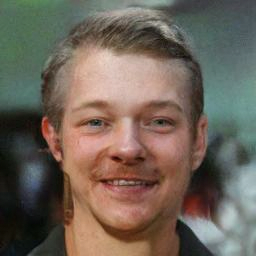

In [29]:
prompt = "Áî∑ÁîüÁöÑÁÖßÁâá"
with torch.no_grad():
    text_inputs = clip_processor(text=[prompt], return_tensors="pt", padding=True).to(device)
    text_features = clip_model.get_text_features(**text_inputs)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)


guidance_scale = 200     # ÊåáÂØºÂº∫Â∫¶ÔºõËøáÂ§ßÂèØËÉΩÊ¢ØÂ∫¶ÁàÜÁÇ∏ÔºåÂèØÈÖåÊÉÖË∞ÉÂ∞è


scheduler.set_timesteps(200)


x = torch.randn(1, 3, 256, 256).to(
    device
)  # ÂàùÂßãÂô™Â£∞

for i, t in tqdm(enumerate(scheduler.timesteps)):

    model_input = scheduler.scale_model_input(x, t)
    
    with torch.no_grad():
        noise_pred = image_pipe.unet(model_input, t)["sample"]

    x = x.detach().requires_grad_()

    x0 = scheduler.step(noise_pred, t, x).pred_original_sample

    loss = clip_loss(x0, text_features) * guidance_scale

    cond_grad = -torch.autograd.grad(loss, x)[0]

    if i % 25 == 0:
        print("Step:", i, ", Guidance loss:", loss.item())

    alpha_bar = scheduler.alphas_cumprod[t]
    x = x.detach() + cond_grad*(1-alpha_bar).sqrt()

    x = scheduler.step(noise_pred, t, x).prev_sample


grid = torchvision.utils.make_grid(x.detach(), nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))

Â¶ÇÊûú‰Ω†Êü•Áúã‰∏äÈù¢ÁöÑ‰ª£Á†ÅÔºåÂ∞±‰ºöÂèëÁé∞Â∞ÜÊù°‰ª∂Ê¢ØÂ∫¶Êåâ alpha_bar.sqrt() ËøõË°åÁº©Êîæ„ÄÇÂÖ≥‰∫éÂ¶Ç‰Ωï‚ÄúÊ≠£Á°Æ‚ÄùÂú∞Áº©ÊîæËøô‰∫õÊ¢ØÂ∫¶ÔºåÁêÜËÆ∫‰∏äÂ∑≤Êúâ‰∏Ä‰∫õÁ†îÁ©∂Ôºå‰ΩÜÂú®ÂÆûË∑µ‰∏≠‰Ω†‰ªçÂèØ‰ª•Ëá™Ë°åË∞ÉËØï„ÄÇÂØπ‰∫éÊüê‰∫õÂºïÂØºÊñπÂºèÔºå‰Ω†ÊàñËÆ∏Â∏åÊúõÂÖ∂‰∏ªË¶Å‰ΩúÁî®ÈõÜ‰∏≠Âú®ÁîüÊàêËøáÁ®ãÁöÑÊó©ÊúüÔºõËÄåÂú®Âè¶Â§ñ‰∏Ä‰∫õÊÉÖÂÜµ‰∏ãÔºà‰æãÂ¶Ç‰∏ìÊ≥®‰∫éÁ∫πÁêÜÁöÑÈ£éÊ†ºÊçüÂ§±ÔºâÔºå‰Ω†ÂèØËÉΩÊõ¥ÂÄæÂêë‰∫éËÆ©ÂÆÉ‰ª¨Âú®ÁîüÊàêÂêéÊúüÊâçÂèëÊå•ÊïàÁî®„ÄÇ‰∏ãÈù¢ÁªôÂá∫Âá†ÁßçÂèØ‰æõÈÄâÊã©ÁöÑË∞ÉÂ∫¶ÊñπÊ°àÔºö



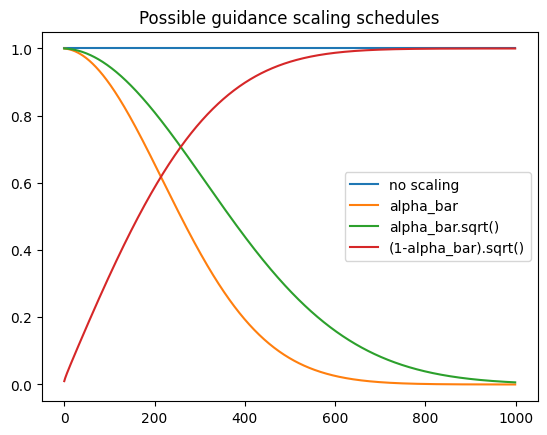

In [30]:
plt.plot([1 for a in scheduler.alphas_cumprod], label="no scaling")
plt.plot([a for a in scheduler.alphas_cumprod], label="alpha_bar")
plt.plot([a.sqrt() for a in scheduler.alphas_cumprod], label="alpha_bar.sqrt()")
plt.plot(
    [(1 - a).sqrt() for a in scheduler.alphas_cumprod], label="(1-alpha_bar).sqrt()"
)
plt.legend()
plt.title("Possible guidance scaling schedules");

Â∞ùËØïÂØπ‰∏çÂêåÁöÑÊó∂Èó¥Ë∞ÉÂ∫¶„ÄÅÂºïÂØºÁ≥ªÊï∞‰ª•Âèä‰Ω†ËÉΩÊÉ≥Âà∞ÁöÑÂÖ∂‰ªñÊäÄÂ∑ßËøõË°åÂÆûÈ™åÔºà‰æãÂ¶ÇÂ∞ÜÊ¢ØÂ∫¶ÈôêÂà∂Âú®Êüê‰∏™ËåÉÂõ¥ÂÜÖÔºåËøôÊòØÂæàÂ∏∏ËßÅÁöÑÊîπËøõÂÅöÊ≥ïÔºâÔºåÁúãÁúã‰Ω†ËÉΩÊääÊïàÊûúÊèêÂçáÂà∞‰ªÄ‰πàÁ®ãÂ∫¶ÔºÅÂ¶ÇÊûúÊää CLIP ÂºïÂØº‰∏éÂÖàÂâçÁî®ËøáÁöÑÈ¢úËâ≤ÊçüÂ§±ÁªìÂêàËµ∑Êù•ÔºåÂèà‰ºöÂ¶Ç‰ΩïÂë¢ÔºüËØ∏Â¶ÇÊ≠§Á±ªÁöÑÁªÑÂêàÈÉΩÂÄºÂæóÊé¢Á¥¢„ÄÇ

Â¶ÇÊûú‰Ω†Êü•Áúã‰∏Ä‰∏ã [CLIP-guided diffusion ÁöÑÂÆûÈôÖ‰ª£Á†ÅÁ§∫‰æã](https://huggingface.co/spaces/EleutherAI/clip-guided-diffusion/blob/main/app.py) Ôºå‰ºöÂèëÁé∞‰∏ÄÁßçÊõ¥Â§çÊùÇÁöÑÂÆûÁé∞ÔºöÂÆÉÊúâÊõ¥ÂÆåÂñÑÁöÑÁ±ªÊù•‰ªéÂõæÂÉè‰∏≠ÈöèÊú∫Ë£ÅÂâ™ÔºàcutoutÔºâÔºåÂπ∂Âú®ÊçüÂ§±ÂáΩÊï∞‰∏≠Âä†ÂÖ•‰∫ÜÂ§ßÈáèÈ¢ùÂ§ñË∞ÉÊï¥Ôºå‰ªéËÄåËé∑ÂæóÊõ¥Â•ΩÁöÑÊÄßËÉΩ„ÄÇÂú®ÊñáÊú¨Êù°‰ª∂Êâ©Êï£Ê®°ÂûãÂá∫Áé∞‰πãÂâçÔºåËøôÂ∞±ÊòØÊúÄÂº∫Â§ßÁöÑÊñáÊú¨Âà∞ÂõæÂÉèÁ≥ªÁªüÔºÅÊàë‰ª¨ËøôÈáåÁöÑÁÆÄÂåñÁâàËøòÊúâÂæàÂ§ßÁöÑ‰ºòÂåñÁ©∫Èó¥Ôºå‰ΩÜÂÆÉÂ∑≤ÂëàÁé∞Âá∫Ê†∏ÂøÉÁêÜÂøµÔºöÂÄüÂä©ÂºïÂØºÊú∫Âà∂Âíå CLIP ÁöÑÂº∫Â§ßËÉΩÂäõÔºåÊàë‰ª¨ÂèØ‰ª•‰∏∫Êó†Êù°‰ª∂Êâ©Êï£Ê®°ÂûãÂä†ÂÖ•ÊñáÊú¨ÊéßÂà∂ üé®„ÄÇ